In [150]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import random as random
import seaborn as sns
import scipy.stats as stats

Read csv file


In [78]:
# Read csv file into a pandas dataframe
df = pd.read_csv(r"C:\Users\Muhammad Shaheer\Desktop\Files\Learning Materials\Python\Data Wrangling\dirty_data.csv", encoding='cp1252')

Take a look at the first few rows


In [79]:
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,Products
0,1/1/2011 0:00,1.0,0,0.0,1.0,9.84,14.395,81.0,0,3.0,13.0,16,1.0,abc
1,1/1/2011 1:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,8.0,32.0,40,2.0,abc
2,1/1/2011 2:00,1.0,0,0.0,1.0,9.02,13.635,80.0,0,5.0,27.0,32,3.0,abc
3,1/1/2011 3:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,3.0,10.0,13,NaN,abc
4,1/1/2011 4:00,1.0,0,0.0,1.0,9.84,14.395,75.0,0,0.0,1.0,1,NaN,abc


In [80]:
df.shape

(10886, 14)

Missing value detection (Column wise)


In [81]:
# Looking at the 'atemp' column
df['atemp']
df['atemp'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10881     True
10882     True
10883     True
10884     True
10885     True
Name: atemp, Length: 10886, dtype: bool

Any Missing Values?

In [82]:
df.isnull().values.any()

True

Total Count of Missing Values


In [83]:
df.isnull().sum().sum()

10995

Missing Value Detection (Row Wise)

<AxesSubplot:>

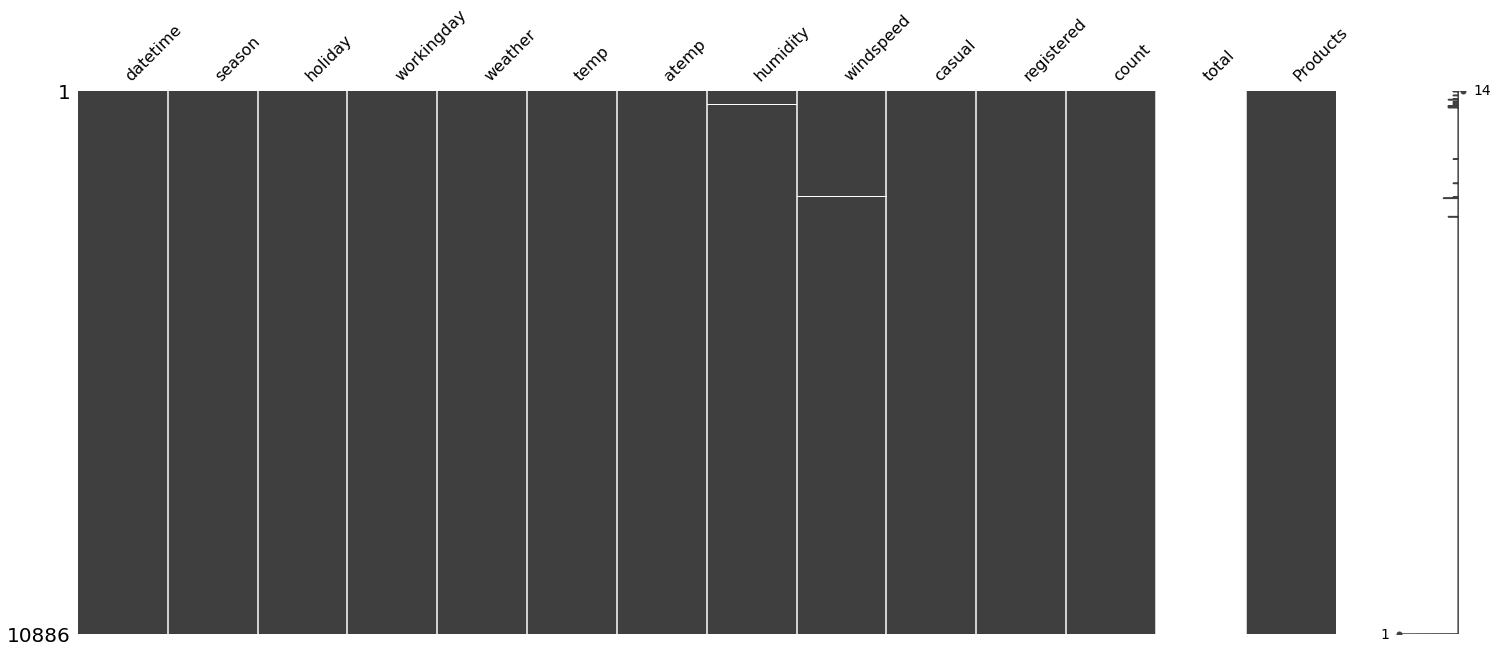

In [84]:
msno.matrix(df)

The plot appears blank(white) wherever there are missing values. For instance, in humidity column there are only one instances of missing data, hence the one white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.

<AxesSubplot:>

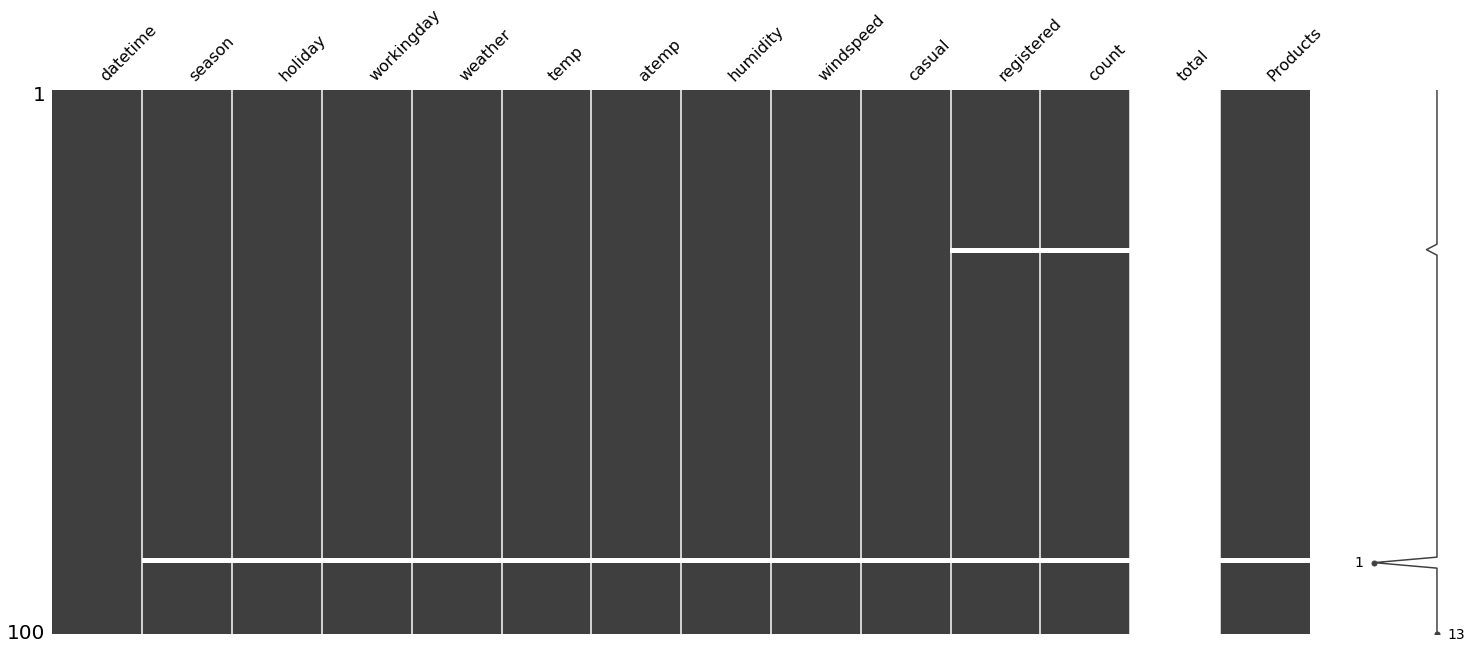

In [85]:
msno.matrix(df.sample(100))


This shows that the columns has no nullity in the first 100 cases.


Replacing/Imputation of Missing Values

In [86]:
# Replace missing values with a number 0
df['total'].fillna(0, inplace=True)

Replace using median 


In [87]:
median = df['total'].median()
df['total'].fillna(median, inplace=True)

Detecting data entry errors and correcting it (Column Wise)

In [88]:
pd.to_numeric(df['humidity'], errors='coerce').isnull().sum()


13

Removing columns and rows which are not useful for business analysis


removing 'total' column as missing values are > 70%

In [89]:
#axis = 1 for column
df = df.drop(labels="total", axis=1)


removing row number 1 15 and 20

In [90]:
#axis = 0 for row
df = df.drop(labels=[1,15,20], axis=0)


Anomaly detection (outlier analysis)


By Standard Deviation

In [108]:
# multiply and add by random numbers to get some real values
df = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(df):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(df)
    random_data_mean = np.mean(df)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in df:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies



In [109]:
find_anomalies(df)

-40.2608855481232


[84.67180882947926,
 -42.025721650827414,
 -42.94261375112175,
 -42.89058750875829,
 -43.04413044868877,
 87.43550278402101,
 105.40865317636397,
 -40.99821710134425,
 88.82209061593763,
 -54.9508462819968,
 -43.68513904041209,
 -41.781258248357915,
 93.11087139225955,
 81.18744446411026,
 -50.278764026479934,
 84.44245412206045,
 -52.177201925990744,
 88.5943041413766,
 -40.4391667050702,
 82.59141991098394,
 -41.64379499040913,
 82.74080502498117,
 -46.85551174127946,
 86.49617924000415,
 95.67377187408132,
 -43.934601243371915,
 -60.935307862317075,
 -41.14352791809157,
 80.78394563249316,
 -40.72242976401941,
 87.74662564232197,
 81.94227671996805,
 -44.78546468946702,
 -54.09608701792054,
 85.30277450516897,
 88.40057847183246,
 82.30307139590442,
 84.4123053336017,
 -48.57257105466702,
 82.71121094080678,
 -45.90170654492701,
 -47.492613323145235,
 83.7823455251949,
 90.58728871717153,
 105.60480506973403,
 85.21576539252703,
 -43.225585546680854,
 -40.357818874270706,
 -45.66585

By Boxplots

C:\Users\Muhammad Shaheer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

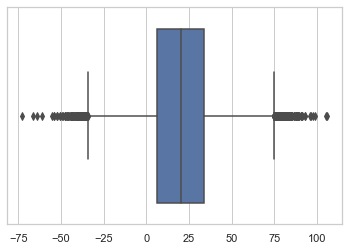

In [132]:
sns.boxplot(df)

Data Transformation

The best way to convert one or more columns of a DataFrame to numeric values is to use pandas.to_numeric().

In [141]:
pd.to_numeric(df)

array([24.66903543, 23.86908072, -7.53051757, ..., 28.06689141,
       35.95757748, 27.06408326])

Descriptive Statistics

In [147]:
msno.bar(df)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

Correlation heatmap

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

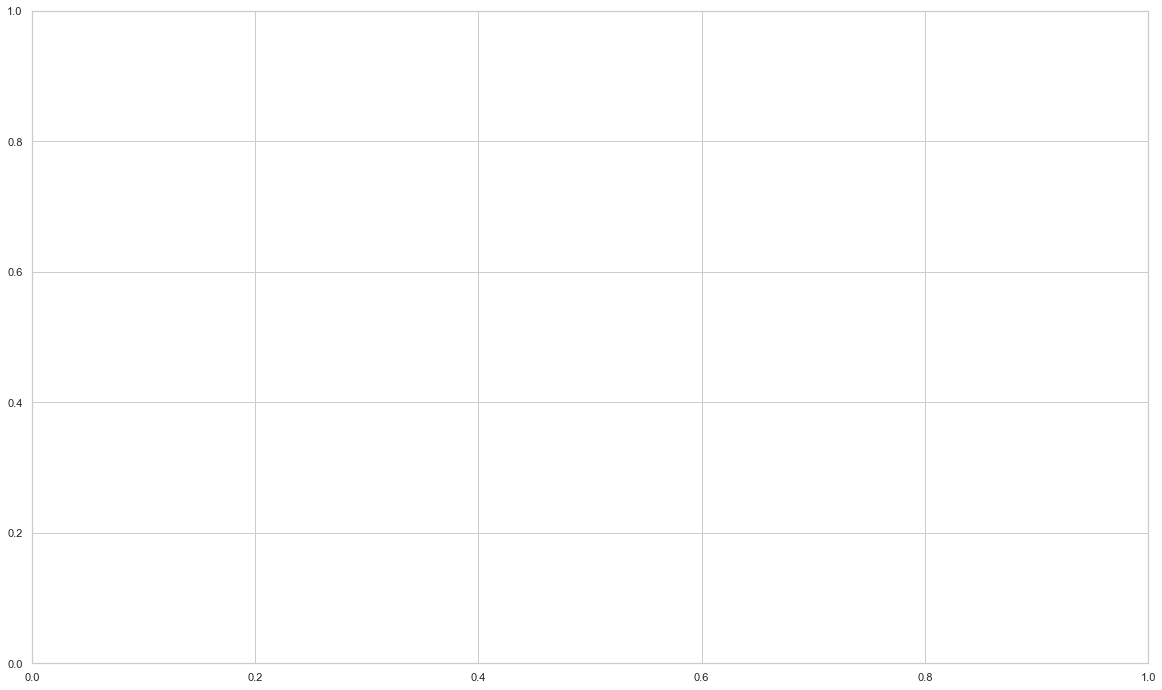

In [149]:
msno.heatmap(df)

Inferential (ANOVA, Tukey, T-Test, Chi-squared)

In [153]:
anova = stats.f_oneway("humidity","sname")
print(anova)
print(anova.pvalue)

ValueError: could not convert string to float: 'humidity'